<a href="https://colab.research.google.com/github/Yash-Yelave/Image_Processing_Computer_Vision/blob/main/IPCV_Image_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Transformations**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (convert BGR -> RGB for matplotlib)
img = cv2.imread("/content/drive/MyDrive/Engineering/Sem5/IPCV/PR2/Image2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h, w) = img.shape[:2]


**Image Translation**

In [40]:
def translate(img, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(img, M, (w, h))

**Reflection**

In [33]:
reflection_x = cv2.flip(img, 0)
reflection_y = cv2.flip(img, 1)
reflection_xy = cv2.flip(img, -1)

**Rotation**

In [34]:
def rotate(img, angle, scale=1.0):
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(img, M, (w, h))

rotated = rotate(img, 45)

**Scaling**

In [35]:
scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

**Cropping**

In [36]:
cropped = img[50:200, 100:300]

**Shearing in x-axis**

In [37]:
M_x = np.float32([[1, 0.5, 0],
                  [0, 1, 0]])
shear_x = cv2.warpAffine(img, M_x, (int(w*1.5), h))

**Shearing in y-axis**

In [38]:
M_y = np.float32([[1, 0, 0],
                  [0.5, 1, 0]])
shear_y = cv2.warpAffine(img, M_y, (w, int(h*1.5)))

**Display Output**

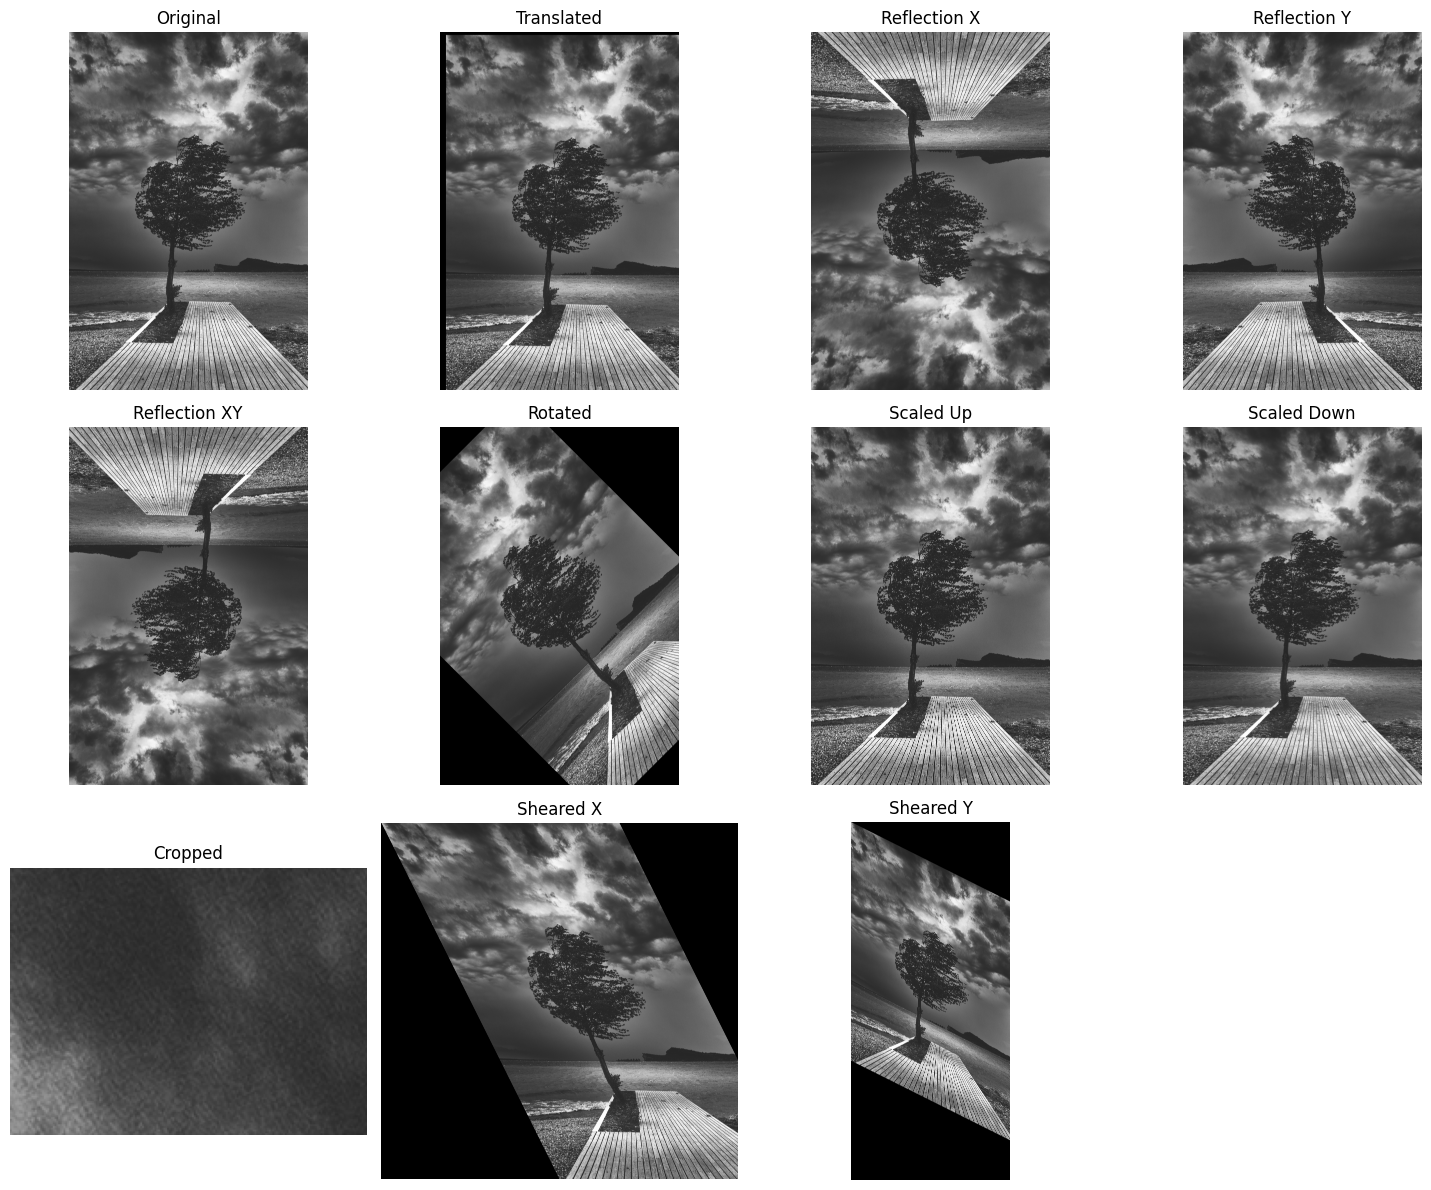

In [39]:
titles = ["Original", "Translated", "Reflection X", "Reflection Y", "Reflection XY",
          "Rotated", "Scaled Up", "Scaled Down", "Cropped", "Sheared X", "Sheared Y"]

images = [img, translate(img, 100, 50), reflection_x, reflection_y, reflection_xy,
          rotated, scaled_up, scaled_down, cropped, shear_x, shear_y]

plt.figure(figsize=(15, 12))
for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()